In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Newfolder\project2\output\all_stocks.csv')
print(df.head())

       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume  
0  15322196  
1    944555  
2   1007308  
3   7481883  
4   1948148  


In [2]:
df['date'] = pd.to_datetime(df['date']) # Convert to datetime
print(df['date'].head())


df = df.sort_values(by=['Ticker', 'date'])  # Sort for correct calculations


0   2023-10-03 05:30:00
1   2023-10-03 05:30:00
2   2023-10-03 05:30:00
3   2023-10-03 05:30:00
4   2023-10-03 05:30:00
Name: date, dtype: datetime64[ns]


In [3]:
df['prev_close'] = df.groupby('Ticker')['close'].shift(1)
df['daily_return'] = (df['close'] - df['prev_close']) / df['prev_close']
print(df[['Ticker', 'date', 'close', 'prev_close', 'daily_return']].head(10))


       Ticker                date    close  prev_close  daily_return
24   ADANIENT 2023-10-03 05:30:00  2387.25         NaN           NaN
74   ADANIENT 2023-10-04 05:30:00  2464.95     2387.25      0.032548
124  ADANIENT 2023-10-05 05:30:00  2466.35     2464.95      0.000568
174  ADANIENT 2023-10-06 05:30:00  2478.10     2466.35      0.004764
224  ADANIENT 2023-10-09 05:30:00  2442.60     2478.10     -0.014325
274  ADANIENT 2023-10-10 05:30:00  2498.30     2442.60      0.022804
324  ADANIENT 2023-10-11 05:30:00  2488.60     2498.30     -0.003883
374  ADANIENT 2023-10-12 05:30:00  2506.35     2488.60      0.007133
424  ADANIENT 2023-10-13 05:30:00  2454.55     2506.35     -0.020668
474  ADANIENT 2023-10-16 05:30:00  2429.35     2454.55     -0.010267


In [4]:
volatility = df.groupby('Ticker')['daily_return'].std().reset_index()  #index changing to column after groubby
volatility.columns = ['Ticker', 'volatility']
print(volatility.head())  #here ticker by ticker group by separate panni and then daily returns taking /and daily retuns std calcu


       Ticker  volatility
0    ADANIENT    0.028601
1  ADANIPORTS    0.026029
2  APOLLOHOSP    0.014135
3  ASIANPAINT    0.012665
4    AXISBANK    0.015625


In [5]:
top_10_volatile = volatility.sort_values(by='volatility',ascending=False).head(10)
print(top_10_volatile)

        Ticker  volatility
0     ADANIENT    0.028601
1   ADANIPORTS    0.026029
8          BEL    0.023283
47       TRENT    0.023074
34        ONGC    0.022247
10        BPCL    0.022069
39  SHRIRAMFIN    0.021687
13   COALINDIA    0.021411
21    HINDALCO    0.019587
33        NTPC    0.019475


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7480\119672352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='volatility', data=top_10_volatile, palette="magma")


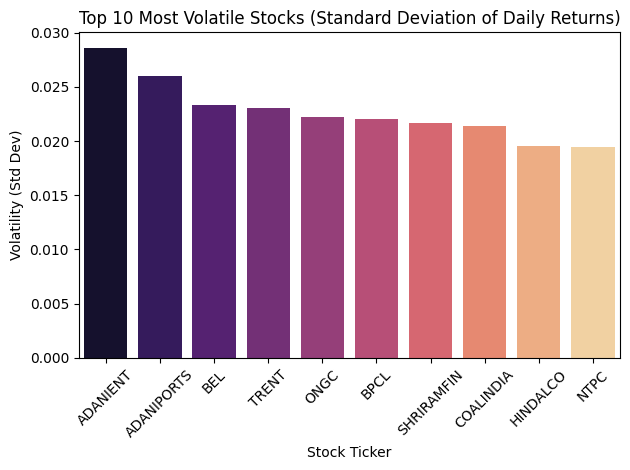

In [6]:
# Plotting

import matplotlib.pyplot as plt

import seaborn as sns

size=(12, 6)
sns.barplot(x='Ticker', y='volatility', data=top_10_volatile, palette="magma")
plt.title("Top 10 Most Volatile Stocks (Standard Deviation of Daily Returns)")
plt.xlabel("Stock Ticker")
plt.ylabel("Volatility (Std Dev)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
volatility.to_csv("volatility1.csv", index=False)


In [8]:
import os

# Save as CSV
output =r'C:\Users\LENOVO\Desktop\Newfolder\project2\output\volatility.csv'
df.to_csv(output, index=False)

print("CSV file saved successfully!")

CSV file saved successfully!
